# Image processing

## Modules
* openCV (fast)
* scipy.ndimage
* Pillow ("PIL")
* scikit-image (rather slow)
* Mahotas
* simpleITK
* ...

Note: All of these modules use numpy arrays. Functions from different modules can be used together!

## How to install OpenCV 3

* open console or terminal (on Windows: press Windows icon and type 'cmd' and Enter)
* then use either the package manager 'pip3' or 'conda' for installation by typing

`pip3 install opencv-python` , or

`conda install -c menpo opencv3`

* when you are asked if you want to install opencv, just confirm with Enter

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 # OpenCV 3 for advanced image processing
%matplotlib inline

## Color spaces
Images are usually 3-dimensional numpy arrays containing the RGB values of each pixel. Only when loaded as gray scale images, then the numpy arrays are 2-dimensional.

<img src="images/colorSpaces.png" style="width: 600px;" align = "left"/> 

## Load and show images

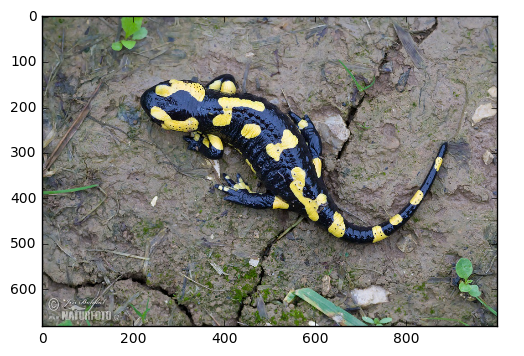

In [2]:
salamander_bgr = cv2.imread('images/fire-salamander2.jpg') # opencv loads images in bgr (blue-green-red) instead rgb
salamander_rgb = cv2.cvtColor(salamander_bgr, cv2.COLOR_BGR2RGB)
salamander_gray = cv2.cvtColor(salamander_bgr, cv2.COLOR_BGR2GRAY)
plt.imshow(salamander_rgb) # opencv has also an imshow function but it does not plot inline

## Image data type

In [3]:
print(type(salamander_rgb))
print('Array entries are of type', salamander_rgb.dtype, '(integers from 0 to 255)')

<class 'numpy.ndarray'>
Array entries are of type uint8 (integers from 0 to 255)


In [4]:
print('RGB image has shape', salamander_rgb.shape)
print('Gray-scale image has shape', salamander_gray.shape, 'and is a 2-dimensional numpy ndarray.')

RGB image has shape (682, 1000, 3)
Gray-scale image has shape (682, 1000) and is a 2-dimensional numpy ndarray.


In [5]:
print(salamander_rgb[:2, :2])

[[[106 107  91]
  [108 109  93]]

 [[108 109  93]
  [108 111  94]]]


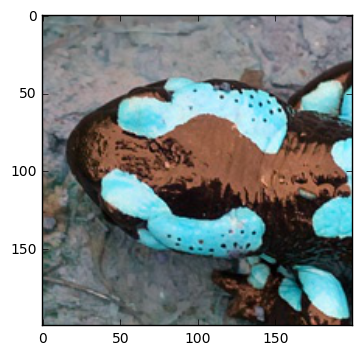

In [6]:
# indexing
plt.imshow(salamander_rgb[100:300, 200:400, [2, 1, 0]]) # image cut-out with red and blue channels switched

## Color spaces

<function __main__.show_image>

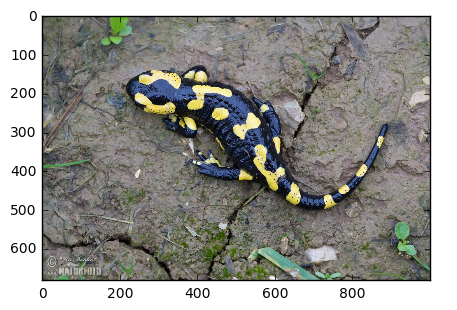

In [7]:
from IPython.html.widgets import interact

def show_image(r_shift, g_shift, b_shift):
    fig, ax = plt.subplots(figsize=(5,5))
    salamander_rgb_shifted = np.array(salamander_rgb, dtype=np.int16) + \
    np.array([r_shift, g_shift, b_shift],dtype=np.int16)
    ax.imshow(np.array(np.clip(salamander_rgb_shifted, 0, 255), dtype=np.uint8))
    
interact(show_image, r_shift = (-255,255,1), g_shift = (-255,255,1), b_shift = (-255,255,1))

<function __main__.show_image>

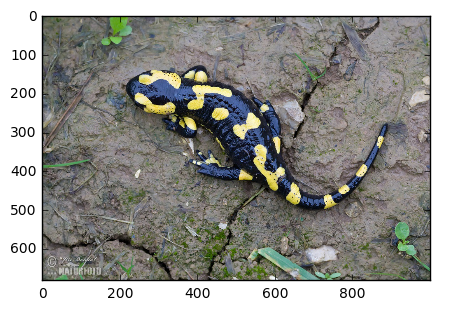

In [8]:
# convert to HSV
salamander_hsv = cv2.cvtColor(salamander_bgr, cv2.COLOR_BGR2HSV)

def show_image(hue_shift, saturation_shift, value_shift):
    fig, ax = plt.subplots(figsize=(5,5))
    salamander_hsv_shifted = salamander_hsv + np.array([hue_shift, saturation_shift, value_shift])
    salamander_hsv_shifted_rgb = cv2.cvtColor(np.array(np.clip(salamander_hsv_shifted, 0, 255), dtype = np.uint8), cv2.COLOR_HSV2RGB)
    ax.imshow(salamander_hsv_shifted_rgb)
    
interact(show_image, hue_shift = (-255, 255, 1), saturation_shift = (-255, 255, 1), value_shift = (-255, 255, 1))

## Thresholding and masking
A threshold is used to make the image binary (zeros and ones). For simplicity, the image is loaded in gray-scale and does not contain color information, only brightness values. A colormap has to be defined when plotted.

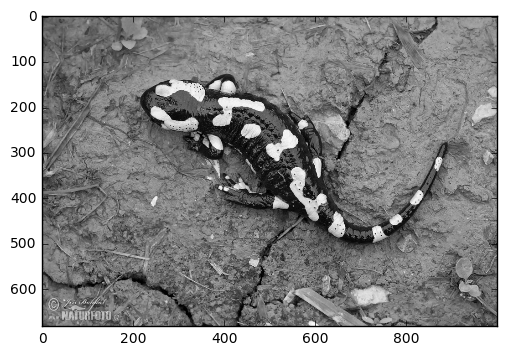

In [9]:
salamander_gray = cv2.imread('images/fire-salamander2.jpg', 0) # load image in gray scale
plt.imshow(salamander_gray, cmap = plt.cm.gray)

(0, 255)

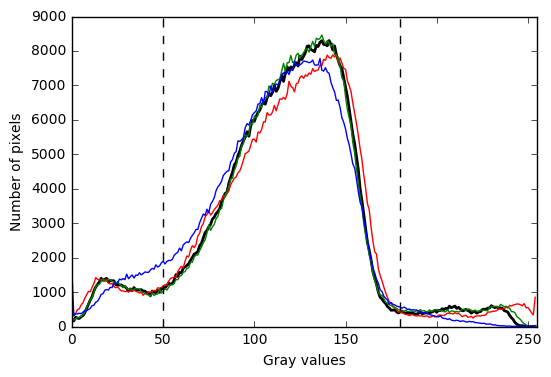

In [10]:
grayPixels, bins = np.histogram(salamander_gray, bins = np.arange(256))
redPixels, bins = np.histogram(salamander_rgb[:, :, 0], bins = np.arange(256))
greenPixels, bins = np.histogram(salamander_rgb[:, :, 1], bins = np.arange(256))
bluePixels, bins = np.histogram(salamander_rgb[:, :, 2], bins = np.arange(256))
plt.plot(grayPixels, 'k', linewidth = 2)
plt.plot(redPixels, 'r')
plt.plot(greenPixels, 'g')
plt.plot(bluePixels, 'b')
lowerThres = 50
upperThres = 180
plt.plot([lowerThres, lowerThres], [0, 9000], '--k') # threshold for dark regions
plt.plot([upperThres, upperThres], [0, 9000], '--k') # threshold for bright regions
plt.xlabel('Gray values')
plt.ylabel('Number of pixels')
plt.xlim(0, 255)

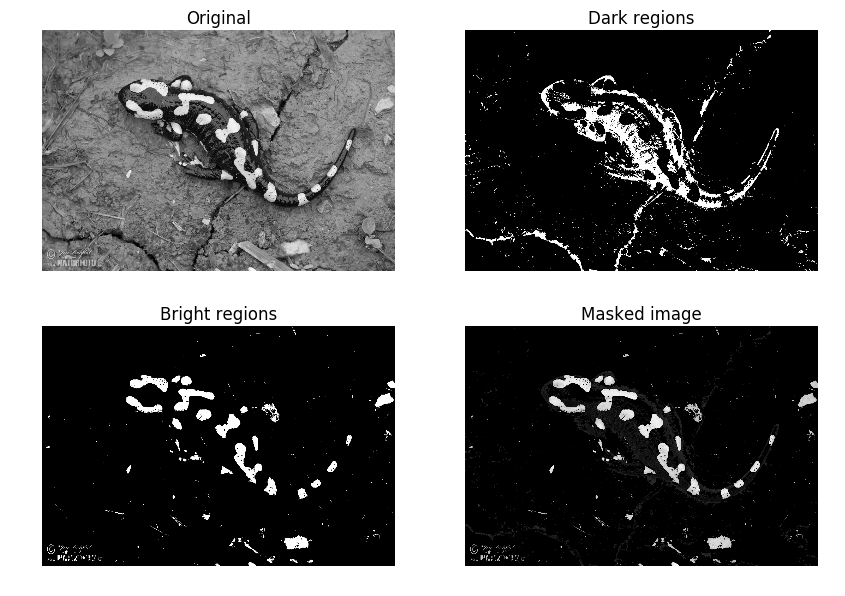

In [11]:
darkRegions = salamander_gray < lowerThres
brightRegions = salamander_gray > upperThres

plt.figure(figsize=(10,7))
plt.subplot(221)
plt.imshow(salamander_gray, cmap = plt.cm.gray)
plt.axis('off')
plt.clim(0, 255)
plt.title('Original')

plt.subplot(222)
plt.imshow(darkRegions, cmap = plt.cm.gray)
plt.axis('off')
plt.title('Dark regions')

plt.subplot(223)
plt.imshow(brightRegions, cmap = plt.cm.gray)
plt.axis('off')
plt.title('Bright regions')

plt.subplot(224)
plt.imshow(salamander_gray*brightRegions+salamander_gray*darkRegions, cmap = plt.cm.gray)
plt.axis('off')
plt.clim(0, 255)
plt.title('Masked image')

## Color filters in Hue-Saturation-Value (HSV)

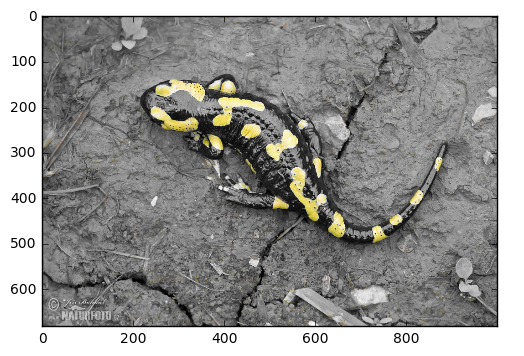

In [12]:
# convert to HSV
salamander_hsv = cv2.cvtColor(salamander_bgr, cv2.COLOR_BGR2HSV)

yellow_lower = np.array([10, 50, 100])
yellow_upper = np.array([30, 255, 255])

# mask yellow regions
yellowMask = cv2.inRange(salamander_hsv, yellow_lower, yellow_upper)

# only yellow regions should be saturated
saturationMask = np.ones(salamander_rgb.shape, dtype = np.uint8)
saturationMask[:, :, 1] = yellowMask > 0

# convert to RGB
salamander_rgb_masked = cv2.cvtColor(salamander_hsv*saturationMask, cv2.COLOR_HSV2RGB)
plt.imshow(salamander_rgb_masked)

## Filtering with image kernels

Convolving an image with a filter matrix (kernel) can be useful for smoothing an image, reducing noise or emphasizing edges and gradients.
<img src = "images/imageKernels.png" style="width: 600px;" align = "right"/> 

### Blurs
Box kernel
$\frac{1}{9}\begin{pmatrix}
1 & 1 & 1\\
1 & 1 & 1\\
1 & 1 & 1
\end{pmatrix}$

Gaussian kernel
$\frac{1}{16}\begin{pmatrix}
1 & 2 & 1\\
2 & 4 & 2\\
1 & 2 & 1
\end{pmatrix}$

### Edge detection
Laplacian kernel
$\begin{pmatrix}
0 & 1 & 0\\
1 & -4 & 1\\
0 & 1 & 0
\end{pmatrix}$

### Sharpen 
$\begin{pmatrix}
0 & -1 & 0\\
-1 & 5 & -1\\
0 & -1 & 0
\end{pmatrix}$

https://en.wikipedia.org/wiki/Kernel_(image_processing)

### Blur and smoothing

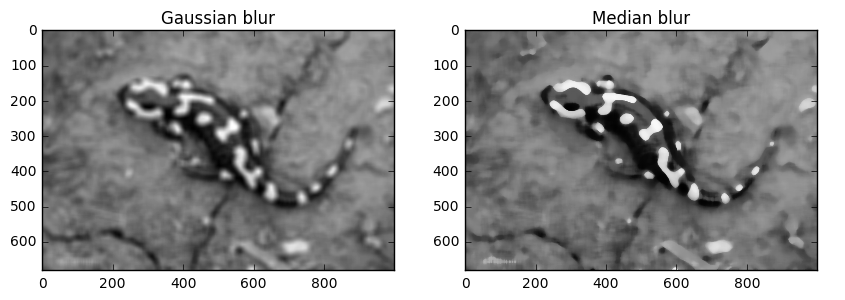

In [13]:
stdv = 10
kernelSize = 2*stdv+1 # size of the kernel usually has to be an odd number
salamander_Gauss = cv2.GaussianBlur(salamander_gray, ksize = (kernelSize, kernelSize), sigmaX = stdv)
salamander_median = cv2.medianBlur(salamander_gray, ksize = kernelSize)

plt.figure(figsize=(10,7))
plt.subplot(121)
plt.imshow(salamander_Gauss, cmap = plt.cm.gray)
plt.title('Gaussian blur')

plt.subplot(122)
plt.imshow(salamander_median, cmap = plt.cm.gray)
plt.title('Median blur')

### Edge detection with Laplacian filtering

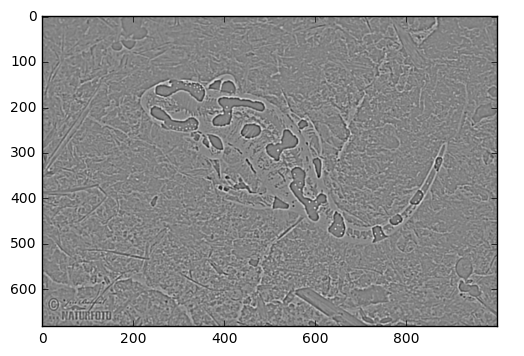

In [14]:
kernelSize = 15;
salamander_Laplace = cv2.Laplacian(salamander_gray, cv2.CV_64F, ksize = kernelSize)
plt.imshow(salamander_Laplace, cmap = plt.cm.gray)

## Low-pass and high-pass filter
Filtering by using Fourier transformations

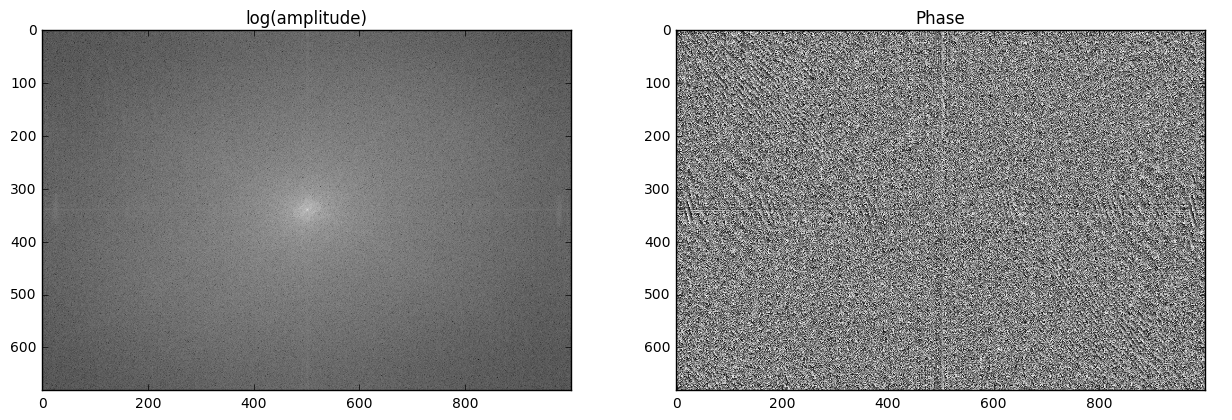

In [15]:
# Fourier transformation
salamander_fft = np.fft.fftshift(np.fft.fft2(salamander_gray))

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.imshow(np.log(np.abs(salamander_fft)),cmap = plt.cm.gray)
plt.title("log(amplitude)")

plt.subplot(122)
plt.imshow(np.angle(salamander_fft),cmap = plt.cm.gray)
plt.title("Phase")

/home/norma/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: DeprecationWarning: numpy boolean negative, the `-` operator, is deprecated, use the `~` operator or the logical_not function instead.
/home/norma/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:11: RuntimeWarning: divide by zero encountered in log
/home/norma/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:15: RuntimeWarning: divide by zero encountered in log


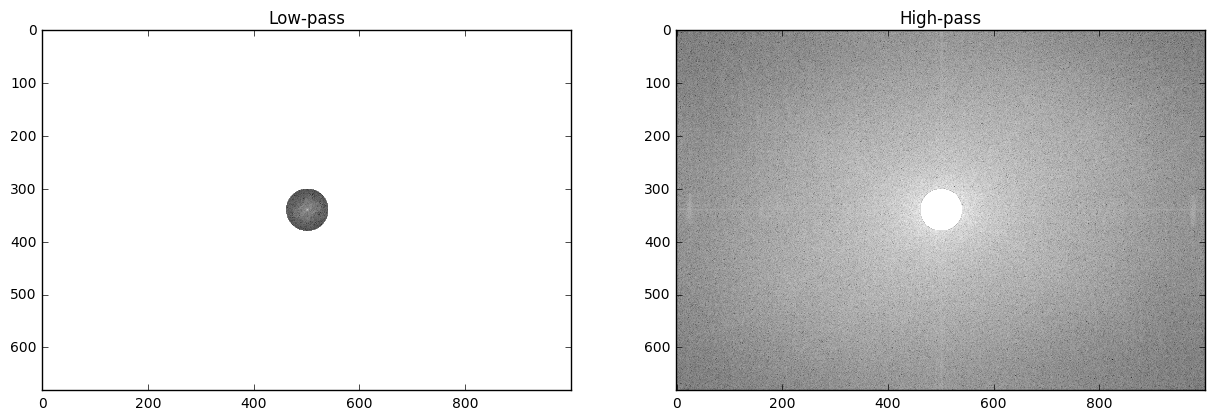

In [16]:
#apply filters
h,w = salamander_gray.shape
radius = 40
lowpass = np.fromfunction(lambda i,j: np.sqrt((i-0.5*h)**2+(j-0.5*w)**2) < radius, salamander_gray.shape)
highpass = - lowpass
salamander_fft_lowpass = np.where(lowpass,salamander_fft,0)
salamander_fft_highpass = np.where(highpass,salamander_fft,0)

plt.figure(figsize = (15,5))
plt.subplot(121)
plt.imshow(np.log(np.abs(salamander_fft_lowpass)),cmap = plt.cm.gray)
plt.title("Low-pass")

plt.subplot(122)
plt.imshow(np.log(np.abs(salamander_fft_highpass)),cmap = plt.cm.gray)
plt.title("High-pass")

(4.85419459597e-16-2.56788336237e-30j)


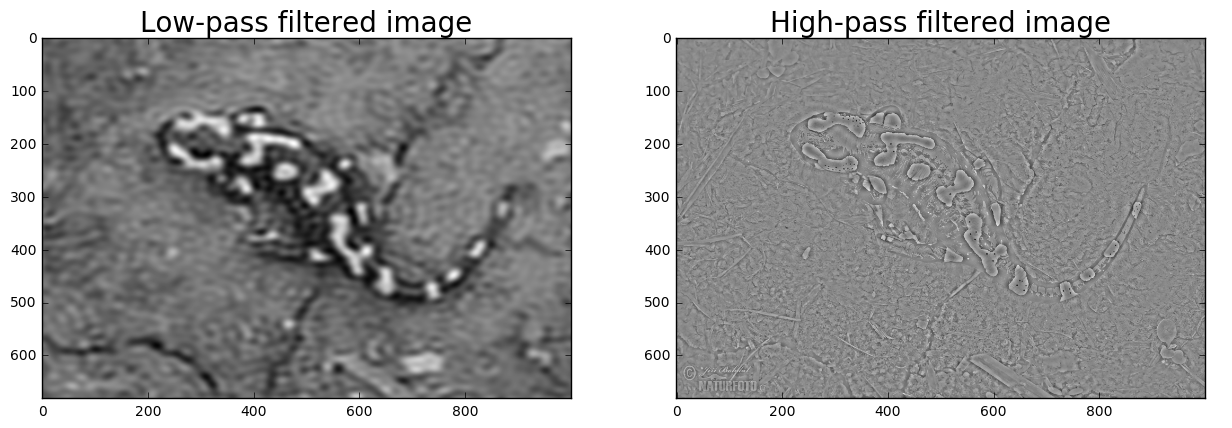

In [17]:
#inverse fourier transformation
salamander_ifft_lowpass = np.fft.ifft2(np.fft.ifftshift(salamander_fft_lowpass))
salamander_ifft_highpass = np.fft.ifft2(np.fft.ifftshift(salamander_fft_highpass))

plt.figure(figsize = (15,5))
plt.subplot(121)
plt.imshow(np.real(salamander_ifft_lowpass), cmap = plt.cm.gray)
plt.title('Low-pass filtered image', fontsize = 20)
plt.subplot(122)
plt.imshow(np.real(salamander_ifft_highpass), cmap = plt.cm.gray)
plt.title('High-pass filtered image', fontsize = 20)
print(np.mean(np.ravel(salamander_ifft_highpass)))

## Adaptive thresholding
Useful for images with global brightness gradients. Threshold depends on mean intensity of pixels within a predefined region around each pixel.

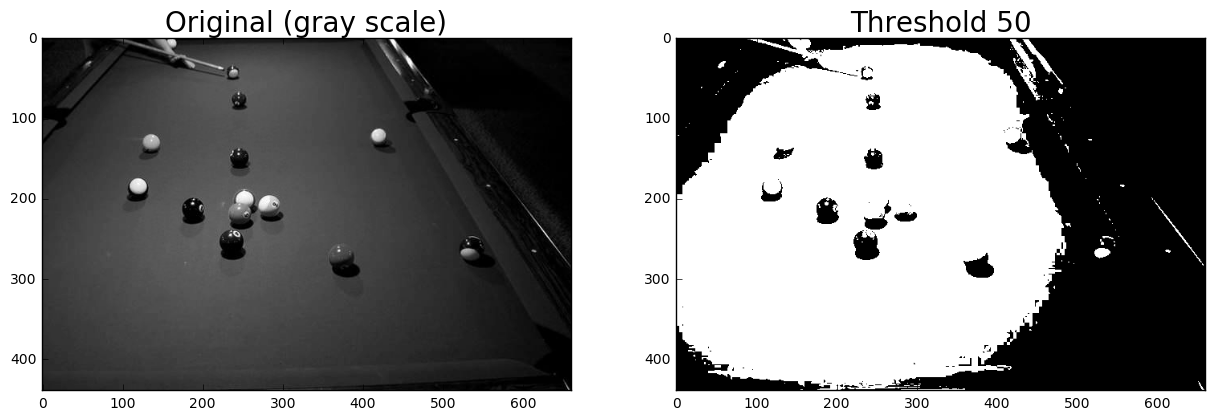

In [18]:
# im_gray = cv2.imread('images/EMsectionRodSynapse_labelsRemoved.jpg', 0)
billard_gray = cv2.imread('images/billard4.jpg', 0)
thres = 50

(thres, billard_thres) = cv2.threshold(billard_gray, thres, 255, type = cv2.THRESH_BINARY)

plt.figure(figsize = (15,5))
plt.subplot(121)
plt.imshow(billard_gray, cmap = 'gray')
plt.title('Original (gray scale)', fontsize = 20)
plt.subplot(122)
plt.imshow(billard_thres, cmap = 'gray')
plt.title('Threshold %d' %thres, fontsize = 20)

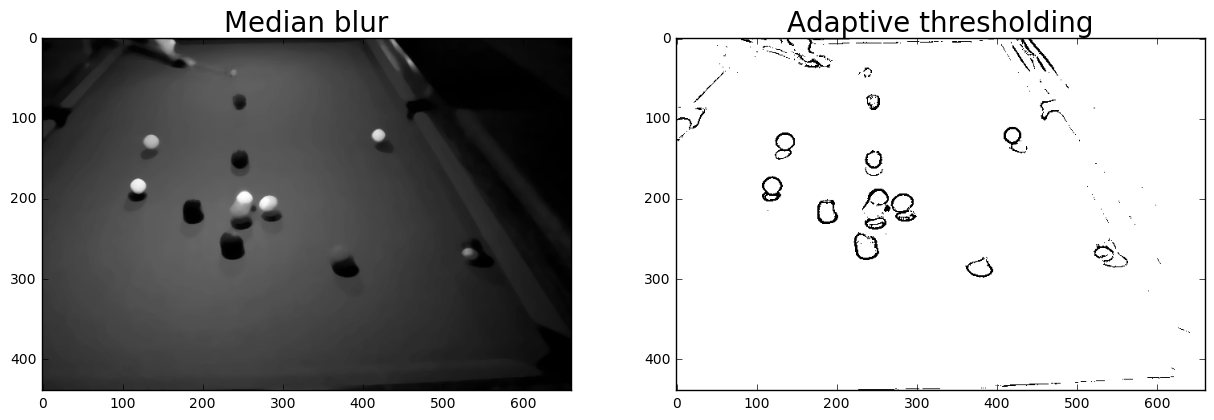

In [19]:
# removing noise with median blur
kernelSize = 11
billard_median = cv2.medianBlur(billard_gray, ksize = kernelSize)

bSize = 7
billard_adaptThres = cv2.adaptiveThreshold(billard_median, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY, blockSize = bSize, C = 3)

plt.figure(figsize = (15,5))
plt.subplot(121)
plt.imshow(billard_median, cmap = 'gray')
plt.title('Median blur', fontsize = 20)
plt.subplot(122)
plt.imshow(billard_adaptThres, cmap = 'gray')
plt.title('Adaptive thresholding', fontsize = 20)

## Example: Blob detection

https://www.learnopencv.com/blob-detection-using-opencv-python-c/
http://docs.opencv.org/3.0-beta/doc/py_tutorials/py_imgproc/py_morphological_ops/py_morphological_ops.html

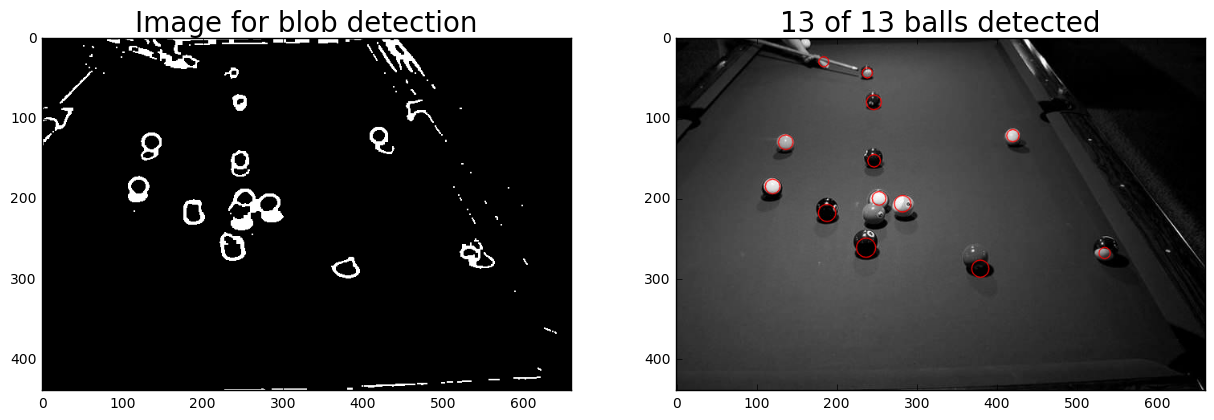

In [20]:
# set up the detector with default parameters
params = cv2.SimpleBlobDetector_Params()

# set parameters for blob detector
params.minDistBetweenBlobs = 20

# filter blobs by size
params.filterByArea = True
params.minArea = 100
params.maxArea = 500

# filter blobs by shape
params.filterByCircularity = 0
params.minCircularity = .7
params.maxCircularity = 1.

params.filterByConvexity = 1
params.minConvexity = .7
params.maxConvexity = 1.

params.filterByInertia = 0
params.minInertiaRatio = .8
params.maxInertiaRatio = 1

detector = cv2.SimpleBlobDetector_create(params)
 
kSize_open = 5
kSize_close = 1
kSize_erode = 2
kSize_dilate = 1
billard_open = cv2.morphologyEx(billard_adaptThres, cv2.MORPH_OPEN, \
                                kernel = np.ones((kSize_open, kSize_open),np.uint8))
billard_detect = cv2.morphologyEx(billard_open, cv2.MORPH_CLOSE, \
                                kernel = np.ones((kSize_close, kSize_close),np.uint8))
billard_detect = cv2.erode(billard_detect, kernel = np.ones((kSize_erode, kSize_erode),np.uint8),iterations = 1)
billard_detect = cv2.dilate(billard_detect, kernel = np.ones((kSize_dilate, kSize_dilate),np.uint8),iterations = 1)

# detect blobs
keypoints = detector.detect(255-billard_detect)
 
# draw detected blobs as red circles
# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures the size of the circle corresponds to the size of blob
im_with_keypoints = cv2.drawKeypoints(billard_gray, keypoints, np.array([]), (255,0,0), \
                                      cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
 
# Show keypoints
plt.figure(figsize = (15,5))
plt.subplot(121)
plt.imshow(255-billard_detect, cmap = 'gray')
plt.title('Image for blob detection', fontsize = 20)
plt.subplot(122)
plt.imshow(im_with_keypoints)
plt.title('%d of 13 balls detected' %len(keypoints), fontsize = 20)

More information on the official OpenCV webpage:

http://docs.opencv.org/3.1.0/d6/d00/tutorial_py_root.html

and others:  https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_tutorials.html